## Testing all the algorithms till now 
- All the algorithms, i.e., Basic, Iterative, SPEA are analysed for 1-qubit and 2-qubit matrices chosen manually.
- One of the matrix that was chosen for two qubit gates was the **CP gate** and a matrix **ZX**.

- **BASIS of TESTING** 
    - Each of the algorithm is given a unitary and run for increasing precision.
    - The algorithm which converges faster is the better algorithm.
    - Converges faster means the amount of iterations of the algorithm required to compute $\theta$ upto 6 bit precision

In [1]:
from qiskit import QuantumCircuit, execute, transpile, Aer 
from qiskit.extensions import UnitaryGate,Initialize
from qiskit.quantum_info import Statevector 
from qiskit.tools.visualization import plot_bloch_vector
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector  
import numpy as np 
from time import sleep 
import sys 
sys.path.append("..")
import os 
from scipy.stats import unitary_group 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [44]:
os.makedirs(name = "Plots/2-qubit/",exist_ok=True)

In [2]:
from Modules.vanilla_qpe import QPE 
from Modules.iterative_qpe import IQPE
from Modules.normal_SPEA import SPEA 
from Modules.kitaev_qpe import KQPE

- **Controlled Phase gate**
- Eigenvectors : $|00\rangle\ ,\ |01\rangle\ , |10\rangle\ and\ |11\rangle$
- Eigenphases : $0\ or\ 1$ and $\frac{1}{7}$

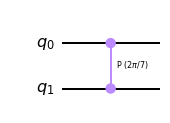

In [4]:
# x gate 
u1 = QuantumCircuit(2)
u1.cp(2*np.pi*(1/7),0,1)
u1.draw('mpl')

- **ZX** unitary
- Eigenvectors : $|0+\rangle\ , |1+\rangle , |1-\rangle and |0-\rangle$
- Eigenphases : $0\ or\ 1$ and $\frac{1}{2}$

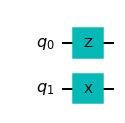

In [47]:
# x gate 
u2 = QuantumCircuit(2)
u2.z(0)
u2.x(1)
u2.draw('mpl')

## Testing the Unitary Phase Estimation for CP(1/7)
- Eigenvector chosen is : **|11>**
- Phase reported should be ~ **0.1428**
- **Basic QPE**

In [48]:
os.makedirs(name = "Plots/2-qubit/phase_gate/",exist_ok=True)
phase_path = "Plots/2-qubit/phase_gate/"

In [49]:
backend = Aer.get_backend('qasm_simulator')

In [50]:
estimates = []
for precision in range(1,9): 
    qpe = QPE(precision=precision,unitary = u1)
    qpe_circ = qpe.get_QPE(show = False)
    qc = QuantumCircuit(precision+2,precision)
    qc.x(precision)
    qc.x(precision+1)
    qc.append(qpe_circ, qargs = list(range(precision+2)))
    qc.measure(list(range(precision)),list(range(precision)))
#     display(qc.draw('mpl')) 
    counts = execute(qc,backend=backend,shots = 2**10).result().get_counts()
    m = -1 
    for i,j in counts.items():
        if j > m:
            m = j 
            phase = i 
    factor = 0.5
    ans = 0.0 
    for i in range(precision):
        ans+= int(phase[i])*factor 
        factor/=2 
    estimates.append(ans)

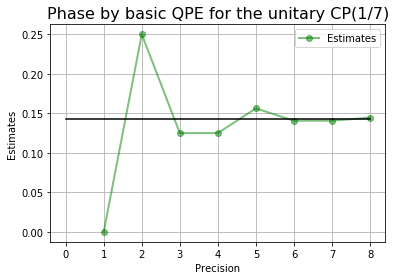

In [51]:
plt.title("Phase by basic QPE for the unitary CP(1/7)",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,alpha = 0.5,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([0,8],[0.1428,0.1428],color = 'black')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(phase_path+"basic_qpe.JPG",dpi = 200)

- **IQPE**

In [52]:
estimates = []
for precision in range(1,9): 
    qpe = IQPE(precision=precision,unitary = u1,unknown=True)
    qc = QuantumCircuit(1+2,precision)
    qc.x(1)
    qc.x(2)    
    phase = qpe.get_circuit_phase(qc, qubits = [1,2], ancilla = 0,clbits = list(range(precision)),show = False)
#     display(qc.draw('mpl')) 
    estimates.append(phase[1])

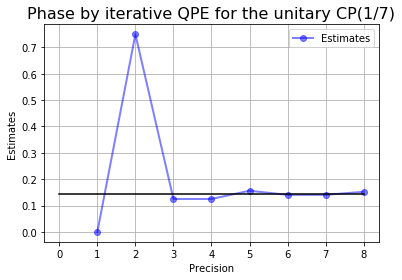

In [53]:
plt.title("Phase by iterative QPE for the unitary CP(1/7)",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'b',alpha = 0.5,linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([0,8],[0.1428,0.1428],color = 'black')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(phase_path+"iqpe.JPG",dpi = 200)

- **SPEA**

In [6]:
backend = Aer.get_backend('qasm_simulator')

In [7]:
estimates = []
for _ in range(100): 
    qpe = SPEA(resolution = 30,unitary = u1, error =4,max_iters=12)
    result = qpe.get_eigen_pair(progress = False, backend = backend)
    print("Result : ",result)
    estimates.append(result['theta'])

E:\ANACONDA\lib\site-packages\qiskit\circuit\quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.96875, 'theta': 0.08799048751486327, 'state': array([0.01967165-0.65859163j, 0.09048696-0.27077917j,
       0.22788427+0.006097j  , 0.26505808+0.60177791j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.998046875, 'theta': 0.02789167247529624, 'state': array([-0.59705766-0.27980457j, -0.01540897+0.20287047j,
        0.24134952+0.65146636j, -0.01845787+0.20208659j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.978515625, 'theta': 0.0789879658862602, 'state': array([-0.20359719+0.04804943j, -0.29176617-0.15167425j,
       -0.6576145 -0.00950453j, -0.50490226-0.40079096j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.97265625, 'theta': 0.08624021075074828, 'state': array([ 0.33564654-0.29639233j,  0.16743189+0.18358321j,
       -0.12754246+0.54756948j, -

Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.998046875, 'theta': 0.009809750297265161, 'state': array([-0.05594098+0.08000102j, -0.25632035-0.18268186j,
        0.33552733+0.86303934j,  0.04593752-0.17852705j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.9921875, 'theta': 0.039239001189060645, 'state': array([ 0.82191163+0.31285688j,  0.17749925+0.14390948j,
       -0.26892686+0.11084715j, -0.04797803-0.2957284j ])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.884765625, 'theta': 0.9386198696133503, 'state': array([-0.60653942+0.06271203j,  0.4005603 -0.1381474j ,
       -0.31680041+0.24496804j, -0.22702898-0.48654894j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.984375, 'theta': 0.05244679978678913, 'state': array([ 0.45871679-0.16120618j,  0.54823035+0.16422444j,
       -0.52638473-0.062748

Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.98828125, 'theta': 0.039239001189060645, 'state': array([-0.59941515+0.14790437j, -0.38696969-0.41842398j,
        0.28562651-0.27693334j,  0.29745377-0.21736671j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.998046875, 'theta': 0.009809750297265161, 'state': array([-0.38366807-0.56509928j, -0.16974888-0.28238985j,
       -0.4881899 -0.37437354j,  0.06106199-0.20661419j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.986328125, 'theta': 0.04344684078888023, 'state': array([ 0.37335179-0.12858219j, -0.24619716+0.66042226j,
        0.42880575-0.08897115j,  0.39432703-0.00451905j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.962890625, 'theta': 0.0971134527860921, 'state': array([ 0.36308562+0.28699838j, -0.35811042+0.22807491j,
        0.18935812+0.22

Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.98046875, 'theta': 0.07312722948870391, 'state': array([ 2.80050778e-04-0.45476646j, -3.98066427e-02-0.44988585j,
       -1.03759091e-01+0.51695932j, -4.85244239e-01-0.27519209j])}


NameError: name 'phase_path' is not defined

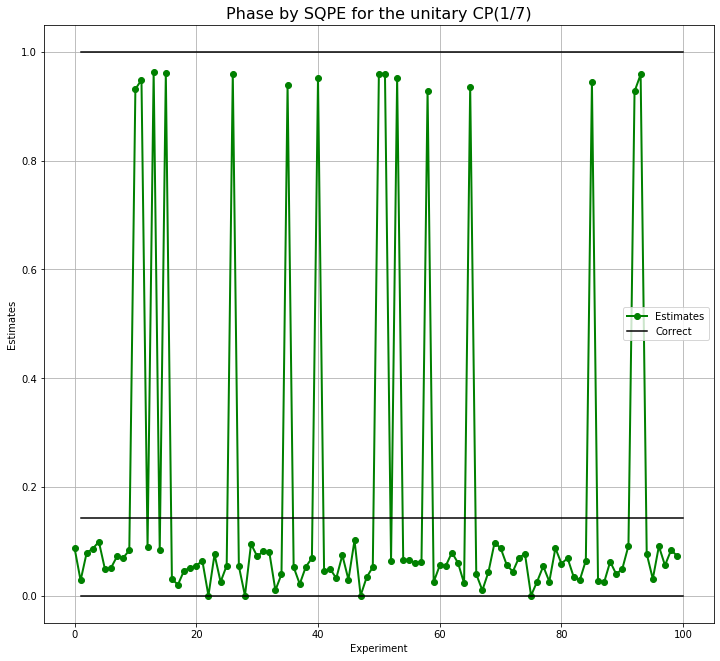

In [11]:
plt.figure(figsize = (12,11))
plt.title("Phase by SQPE for the unitary CP(1/7)",fontsize = 16)
plt.plot(range(100),estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([1,100],[0.1428,0.1428],color = 'black')
plt.plot([1,100],[0,0],color = 'black')
plt.plot([1,100],[1,1],color = 'black',label = 'Correct')
plt.xlabel('Experiment')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(phase_path+"stat_qpe.JPG",dpi = 200)

- Kitaev's Algorithm

In [56]:
estimates = []
for precision in range(5,16): 
    kqpe = KQPE(precision=precision,unitary = u1)
    kqpe_circ = kqpe.get_circuit()
    qc = QuantumCircuit(2+2,2)
    qc.x(2)
    qc.x(3)
    qc.append(kqpe_circ,qargs = [0,1,2,3])
    phase = kqpe.get_phase(qc,backend = backend, ancilla = [0,1],clbits = [0,1],show = False)
    print("Precision :",precision)
    print("Phase:",phase)
    estimates.append(phase[0])

Precision : 5
Phase: (0.1516376436365229, [0, 0, 1, 0, 0])
Precision : 6
Phase: (0.13602573182422084, [0, 0, 1, 0, 0, 0])
Precision : 7
Phase: (0.14693523068279313, [0, 0, 1, 0, 0, 1, 0])
Precision : 8
Phase: (0.14402894157304708, [0, 0, 1, 0, 0, 1, 0, 0])
Precision : 9
Phase: (0.14330483129193106, [0, 0, 1, 0, 0, 1, 0, 0, 1])
Precision : 10
Phase: (0.1419921786214931, [0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
Precision : 11
Phase: (0.14355072857036352, [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])
Precision : 12
Phase: (0.14238931632653223, [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])
Precision : 13
Phase: (0.14332901077556737, [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])
Precision : 14
Phase: (0.143548839188671, [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])
Precision : 15
Phase: (0.14283498412182935, [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])


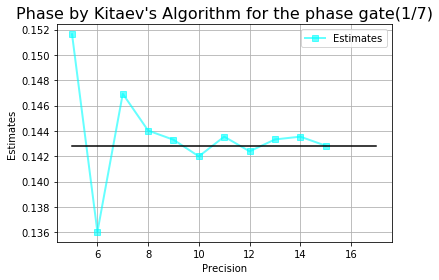

In [57]:
plt.title("Phase by Kitaev's Algorithm for the phase gate(1/7)",fontsize = 16)
plt.plot([i for i in range(5,16)],estimates,color = 'cyan',alpha = 0.6,linewidth = 2,marker = 's',label = 'Estimates')
plt.plot([5,17],[0.1428,0.1428],color = 'black')
plt.xlabel('Precision')     
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(phase_path+"kitaev_qpe.JPG",dpi = 200)

## Testing PEA for ZX unitary 
- Eigenvector chosen **|0->**
- Phase should be coming out as 1/2.


In [58]:
os.makedirs(name = "Plots/2-qubit/zx_gate/",exist_ok=True)
zx_path = "Plots/2-qubit/zx_gate/"

- **Basic QPE**

In [59]:
estimates = []
for precision in range(1,9): 
    # 
    qpe = QPE(precision=precision,unitary = u2)
    qpe_circ = qpe.get_QPE(show = False)
    # Quantum Circuit 
    qc = QuantumCircuit(precision+2,precision)
    
    # make the eigenvector 
    qc.x(precision+1)
    qc.h(precision+1)
    qc.append(qpe_circ, qargs = list(range(precision+2)))
    qc.measure(list(range(precision)),list(range(precision)))
    
    counts = execute(qc,backend=backend,shots = 2**10).result().get_counts()
    m = -1 
    for i,j in counts.items():
        if j > m:
            m = j 
            phase = i 
    factor = 0.5
    ans = 0.0 
    for i in range(precision):
        ans+= int(phase[i])*factor 
        factor/=2 
    estimates.append(ans)

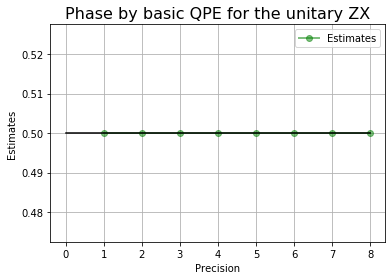

In [60]:
plt.title("Phase by basic QPE for the unitary ZX",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,alpha = 0.5,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([0,8],[0.5,0.5],color = 'black')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(zx_path+"basic_qpe.JPG",dpi = 200)

- **Iterative QPE**

In [61]:
estimates = []
for precision in range(1,9): 
    qpe = IQPE(precision=precision,unitary = u2,unknown=True)
    qc = QuantumCircuit(1+2,precision)
    # making the eigenvector
    qc.x(2)
    qc.h(2)    
    phase = qpe.get_circuit_phase(qc, qubits = [1,2], ancilla = 0,clbits = list(range(precision)),show = False)
#     display(qc.draw('mpl')) 
    estimates.append(phase[1])

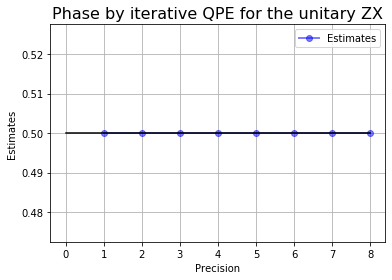

In [62]:
plt.title("Phase by iterative QPE for the unitary ZX",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'b',alpha = 0.5,linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([0,8],[0.5,0.5],color = 'black')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(zx_path+"iqpe.JPG",dpi = 200)

- **SPEA**

In [63]:
estimates = []
for resolution in range(10,40,5): 
    qpe = SPEA(resolution = resolution,unitary = u2, error =4,max_iters=12)
    result = qpe.get_eigen_pair(progress = True, backend = backend)
    print("Result : ",result)
    estimates.append(result['theta'])

Right : 1
Left : 0.5277777777777777
ITERATION NUMBER 1 ...
100.000000 %completed
COST : 0.841796875
THETA : 0.8950617283950617
Right : 1
Left : 0.7700617283950617
ITERATION NUMBER 2 ...
100.000000 %completed
COST : 0.95703125
THETA : 0.9489026063100137
Right : 1
Left : 0.8864026063100137
ITERATION NUMBER 3 ...
100.000000 %completed
No change, updating a...

COST : 0.95703125
THETA : 0.9489026063100137
Right : 1
Left : 0.8864026063100137
ITERATION NUMBER 4 ...
100.000000 %completed
COST : 0.9609375
THETA : 0.9621342021033379
Right : 0.9933842021033379
Left : 0.9308842021033379
ITERATION NUMBER 5 ...
100.000000 %completed
No change, updating a...

COST : 0.9609375
THETA : 0.9621342021033379
Right : 0.9933842021033379
Left : 0.9308842021033379
ITERATION NUMBER 6 ...
100.000000 %completed
No change, updating a...

COST : 0.9609375
THETA : 0.9621342021033379
Right : 0.9933842021033379
Left : 0.9308842021033379
ITERATION NUMBER 7 ...
100.000000 %completed
No change, updating a...

COST : 0.9

100.000000 %completed
No change, updating a...

COST : 0.830078125
THETA : 0.39388020833333326
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.830078125, 'theta': 0.39388020833333326, 'state': array([-0.59630575+0.53259732j, -0.01883787-0.08155608j,
        0.28288271-0.36977627j, -0.3191964 -0.18737619j])}
Right : 0.4224137931034483
Left : 0
ITERATION NUMBER 1 ...
100.000000 %completed
COST : 0.861328125
THETA : 0.08739595719381689
Right : 0.21239595719381688
Left : 0
ITERATION NUMBER 2 ...
100.000000 %completed
COST : 0.890625
THETA : 0.0732399852392472
Right : 0.13573998523924719
Left : 0.010739985239247199
ITERATION NUMBER 3 ...
100.000000 %completed
COST : 0.896484375
THETA : 0.0753951576530403
Right : 0.1066451576530403
Left : 0.04414515765304031
ITERATION NUMBER 4 ...
100.000000 %completed
COST : 0.908203125
THETA : 0.06569688179097134
Right : 0.08132188179097134
Left : 0.05007188179097134
ITERATION NUMBER 5 ...
100.000000 %completed


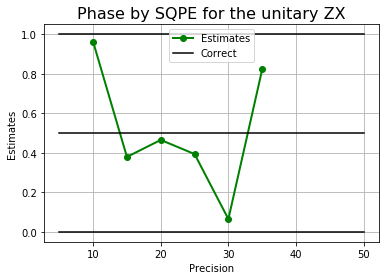

In [64]:
plt.title("Phase by SQPE for the unitary ZX",fontsize = 16)
plt.plot([i for i in range(10,40,5)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([5,50],[0.5,0.5],color = 'black')
plt.plot([5,50],[0,0],color = 'black')
plt.plot([5,50],[1,1],color = 'black',label = 'Correct')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(zx_path+"stat_qpe.JPG",dpi = 200)

- Kitaev's Algorithm

In [65]:
estimates = []
for precision in range(5,16): 
    kqpe = KQPE(precision=precision,unitary = u2)
    kqpe_circ = kqpe.get_circuit()
    qc = QuantumCircuit(2+2,2)
    qc.x(3)   
    qc.h(3)
    qc.append(kqpe_circ,qargs = [0,1,2,3])
    phase = kqpe.get_phase(qc,backend = backend, ancilla = [0,1],clbits = [0,1],show = False)
#     display(qc.draw('mpl')) 
    print("Precision :",precision)
    print("Phase:",phase)
    estimates.append(phase[0])

Precision : 5
Phase: (-0.497016194448965, [0, 0, 0, 0, 0])
Precision : 6
Phase: (0.49651904078015835, [0, 1, 1, 1, 1, 1])
Precision : 7
Phase: (-0.4980106668181378, [0, 0, 0, 0, 0, 0, 0])
Precision : 8
Phase: (0.4941586537208397, [0, 1, 1, 1, 1, 1, 1, 0])
Precision : 9
Phase: (0.49825931221991, [0, 1, 1, 1, 1, 1, 1, 1, 1])
Precision : 10
Phase: (-0.4998756602260065, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Precision : 11
Phase: (0.4997357781692497, [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Precision : 12
Phase: (0.49993005886740144, [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Precision : 13
Phase: (0.49911797357880044, [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])
Precision : 14
Phase: (0.49968915089703836, [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])
Precision : 15
Phase: (-0.49949681405133173, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


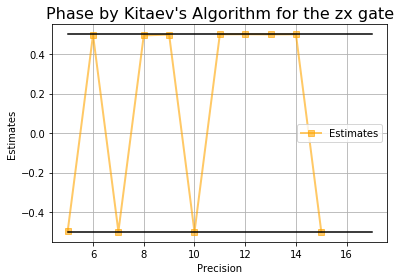

In [66]:
plt.title("Phase by Kitaev's Algorithm for the zx gate",fontsize = 16)
plt.plot([i for i in range(5,16)],estimates,color = 'orange',alpha = 0.6,linewidth = 2,marker = 's',label = 'Estimates')
plt.plot([5,17],[0.5,0.5],color = 'black')
plt.plot([5,17],[-0.5,-0.5],color = 'black')

plt.xlabel('Precision')     
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(zx_path+"kitaev_qpe.JPG",dpi = 200)